# Preposseing of the crsp data (not used)

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from datetime import datetime
import pandas as pd
from urllib.request import urlopen

ModuleNotFoundError: No module named 'pandas'

In [32]:
# Read CSV data from URL
df = pd.read_csv("/Users/jensknudsen/Desktop/seminar/datashare.csv")

# make a new column with the date as a datetime object
df['datetime'] = pd.to_datetime(df['DATE'].astype(str), format='%Y%m%d')

# make a function that findt the first day of the closest month
def get_closest_first_day(date):
    year = date.year
    month = date.month
    day = date.day
    if day > 15:
        if month == 12:
            month = 1
            year += 1
        else:
            month += 1
    return datetime.datetime(year, month, 1)

# apply the function to the dataframe
df['month'] = df['datetime'].apply(get_closest_first_day)

# delete the not used date columns
del df["DATE"]
del df["datetime"]

# make chareacteristic variables
df = df.rename(columns={col: f"characteristic_{col}" for col in df.columns if col not in ["permno", "month", "sic2"]})

,permno,characteristic_mvel1,characteristic_beta,characteristic_betasq,characteristic_chmom,characteristic_dolvol,characteristic_idiovol,characteristic_indmom,characteristic_mom1m,characteristic_mom6m,...,characteristic_ms,characteristic_baspread,characteristic_ill,characteristic_maxret,characteristic_retvol,characteristic_std_dolvol,characteristic_std_turn,characteristic_zerotrade,sic2,month
0,10006,8.630850e+04,1.117907,1.249717,0.134574,10.296745,0.024863,0.059540,0.002016,0.081150,...,NaN,0.013856,1.557681e-07,0.029167,0.013546,0.914592,0.802461,1.066005e-07,37.0,1957-04-01
1,10014,3.903375e+03,0.331304,0.109762,0.006667,7.032404,0.065248,0.059540,-0.086957,-0.080000,...,NaN,0.031389,8.383815e-06,0.071429,0.031165,0.943409,0.716406,1.105263e+00,NaN,1957-04-01
2,10022,9.841000e+03,0.942052,0.887461,0.058761,7.294038,0.029338,0.059540,-0.037037,-0.005452,...,NaN,0.010066,5.360386e-06,0.020000,0.016886,0.993558,0.534808,2.387797e-07,NaN,1957-04-01
3,10030,5.190100e+04,0.886532,0.785940,-0.032065,9.516942,0.022007,0.059540,0.000000,0.033590,...,NaN,0.009523,1.090908e-07,0.017857,0.009104,0.736000,0.712647,9.202902e-08,NaN,1957-04-01
4,10057,3.525000e+04,1.229520,1.511719,-0.102811,8.421013,0.025453,0.059540,-0.030717,0.048778,...,NaN,0.007661,2.386914e-07,0.007194,0.006748,0.889503,0.775954,6.631579e+00,NaN,1957-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3760203,93428,1.250976e+06,1.595315,2.545028,-0.137348,14.916210,0.043201,0.016401,-0.001203,-0.047018,...,6.0,0.029302,1.010214e-09,0.027604,0.017847,0.490189,5.347476,8.664791e-09,73.0,2017-01-01
3760204,93429,5.600537e+06,0.298267,0.088963,0.206434,16.319190,0.026198,-0.071728,0.093973,0.000143,...,6.0,0.016001,1.093471e-10,0.040887,0.010437,0.539155,6.252920,8.275139e-09,62.0,2017-01-01
3760205,93433,2.473625e+04,2.324893,5.405128,0.328248,9.975208,0.185537,-0.002451,0.279070,-0.358209,...,2.0,0.149511,3.889972e-07,0.405473,0.137955,1.285707,29.078756,5.014198e-09,65.0,2017-01-01
3760206,93434,8.573280e+04,0.628519,0.395036,0.020854,10.862196,0.059797,0.015187,-0.049505,0.109890,...,3.0,0.042877,8.576942e-08,0.031579,0.019838,0.629682,2.431419,3.518593e-08,1.0,2017-01-01


# Load the ML file from the beginning

In [1]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")

print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")
print("TensorFlow version: ", tensorflow.__version__)

Python Platform: macOS-13.2-arm64-i386-64bit
Tensor Flow Version: 2.9.0
Keras Version: 2.9.0

Python 3.8.16 (default, Feb 15 2023, 15:28:05) 
[Clang 14.0.0 (clang-1400.0.29.202)]
Pandas 1.5.3
Scikit-Learn 1.2.1
SciPy 1.10.0
GPU is available
TensorFlow version:  2.9.0


In [3]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import sqlite3
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Print all the vairables in the environment
connection = sqlite3.connect("/Users/jensknudsen/Desktop/Seminar/tidy_finance_ML.sqlite")
connection.row_factory = sqlite3.Row
cursor = connection.execute('select * from stock_characteristics_monthly')
# instead of cursor.description:
row = cursor.fetchone()
names = row.keys()
print(names)

['permno', 'month', 'ret_excess', 'mktcap_lag', 'sic2', 'macro_dp', 'macro_dy', 'macro_ep', 'macro_de', 'macro_svar', 'macro_bm', 'macro_ntis', 'macro_tbl', 'macro_lty', 'macro_ltr', 'macro_tms', 'macro_dfy', 'macro_infl', 'characteristic_mvel1', 'characteristic_beta', 'characteristic_betasq', 'characteristic_chmom', 'characteristic_dolvol', 'characteristic_idiovol', 'characteristic_indmom', 'characteristic_mom1m', 'characteristic_mom6m', 'characteristic_mom12m', 'characteristic_mom36m', 'characteristic_pricedelay', 'characteristic_turn', 'characteristic_absacc', 'characteristic_acc', 'characteristic_age', 'characteristic_agr', 'characteristic_bm', 'characteristic_bm_ia', 'characteristic_cashdebt', 'characteristic_cashpr', 'characteristic_cfp', 'characteristic_cfp_ia', 'characteristic_chatoia', 'characteristic_chcsho', 'characteristic_chempia', 'characteristic_chinv', 'characteristic_chpmia', 'characteristic_convind', 'characteristic_currat', 'characteristic_depr', 'characteristic_divi

In [28]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect("/Users/jensknudsen/Desktop/Seminar/tidy_finance_ML.sqlite")

# Create a pandas DataFrame from the "crsp_monthly" table in the SQLite database
crsp_monthly = pd.read_sql_query("SELECT permno, month, ret_excess, mktcap_lag, sic2, macro_dp, macro_bm, macro_ntis, macro_tbl, characteristic_mom1m, characteristic_mvel1, characteristic_mom12m, characteristic_chmom, characteristic_maxret FROM stock_characteristics_monthly", conn)

# define a function to convert the number of days to a datetime object
def convert_days_to_datetime(num_days):
    start_date = datetime.datetime(1960, 1, 1)
    delta = datetime.timedelta(days=num_days)
    return start_date + delta

# apply the function to the 'date' column to convert it to datetime
crsp_monthly['month'] = crsp_monthly['month'].apply(convert_days_to_datetime)
crsp_monthly

# Select only the stocks that have 708 observations
df = crsp_monthly.query('month >= "1960-01-01"') \
                   .groupby('permno') \
                   .filter(lambda x: len(x) >= 611)

# Count the number of unique stocks in the DataFrame
num_stocks = len(df['permno'].unique())

# make a function that findt the first day of the closest month
def get_closest_first_day(date):
    year = date.year
    month = date.month
    day = date.day
    if day > 15:
        if month == 12:
            month = 1
            year += 1
        else:
            month += 1
    return datetime.datetime(year, month, 1)

# apply the function to the dataframe
df['date'] = df['month'].apply(get_closest_first_day)

### heatmap

/var/folders/73/n7lgj33x23g9bs4jy5z1pgg40000gn/T/ipykernel_46322/1144810537.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


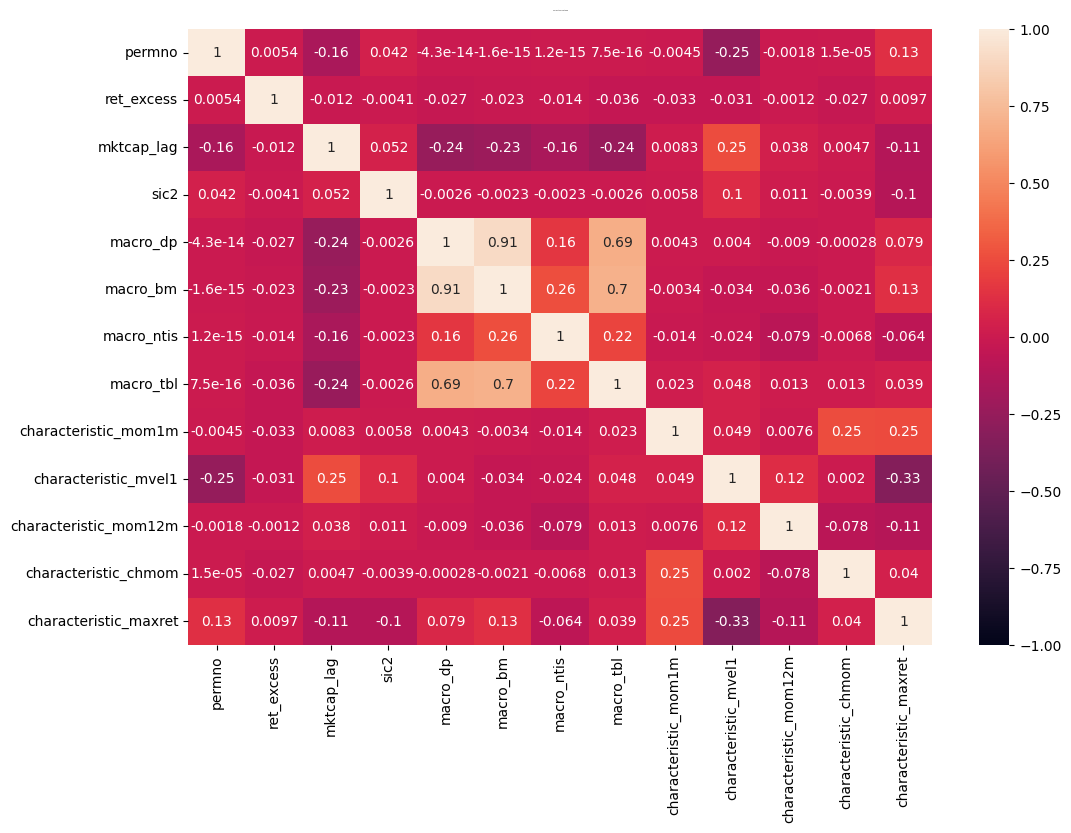

In [14]:
# Increase the size of the heatmap.
plt.figure(figsize=(12, 8))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':1}, pad=13);

In [22]:
df.columns[0]

'permno'

### distribution of the variables

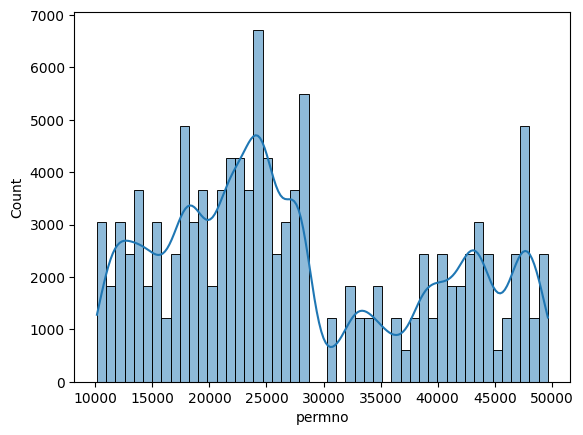

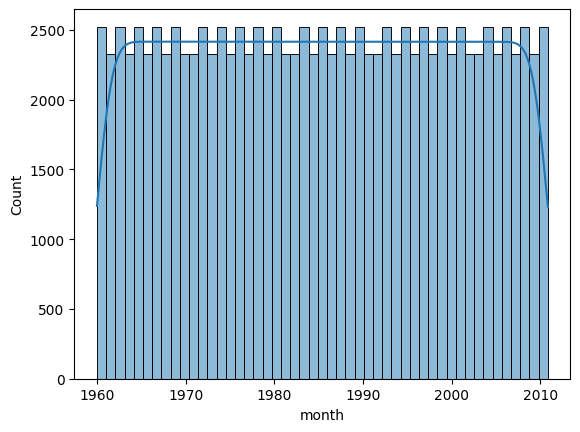

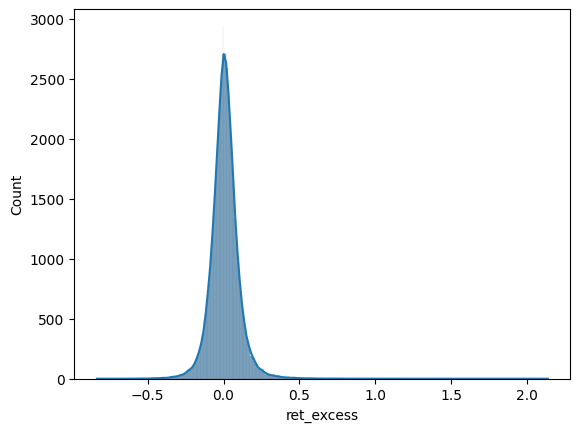

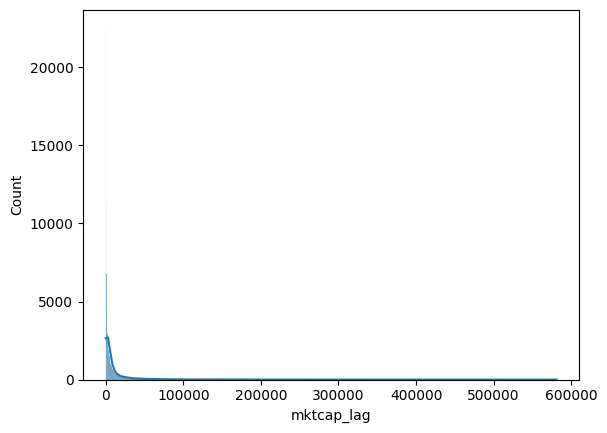

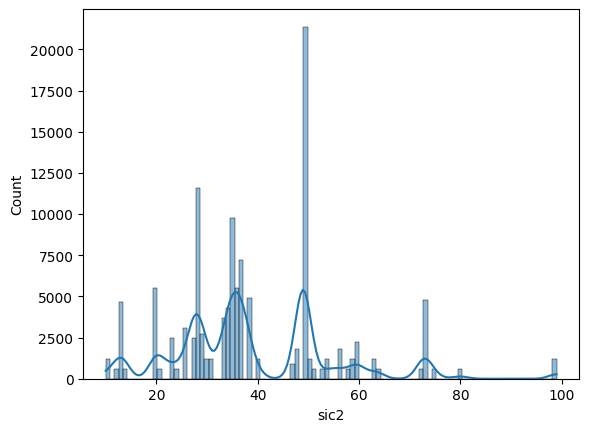

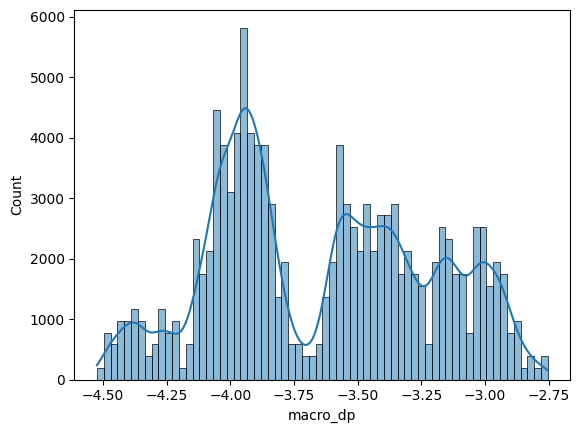

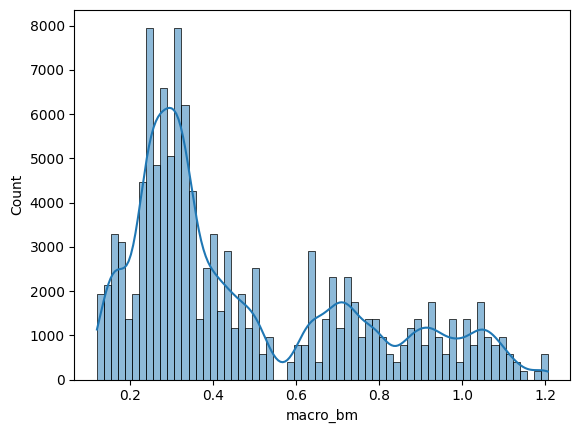

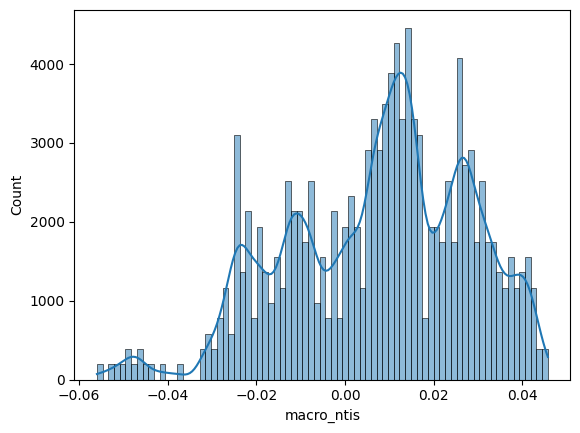

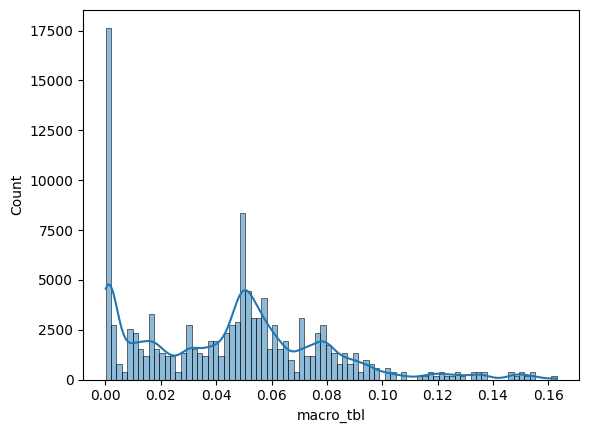

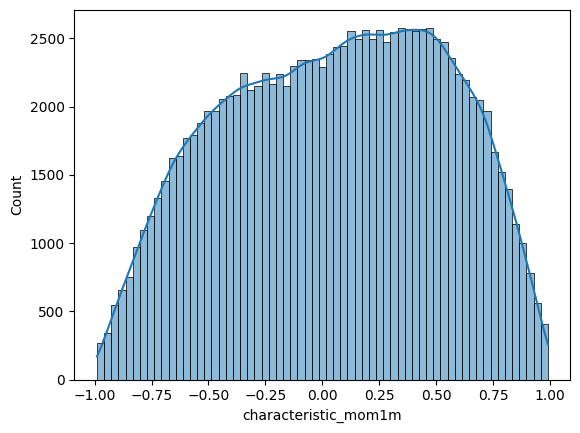

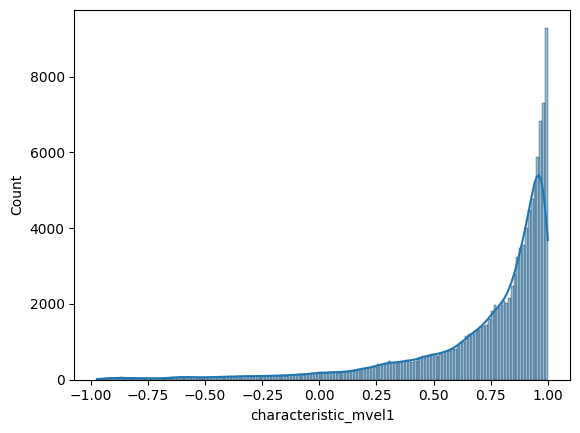

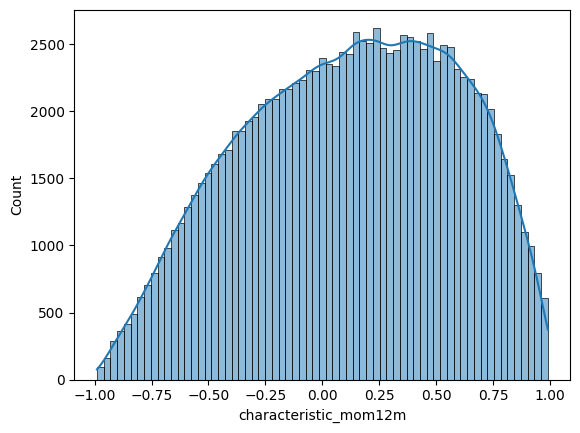

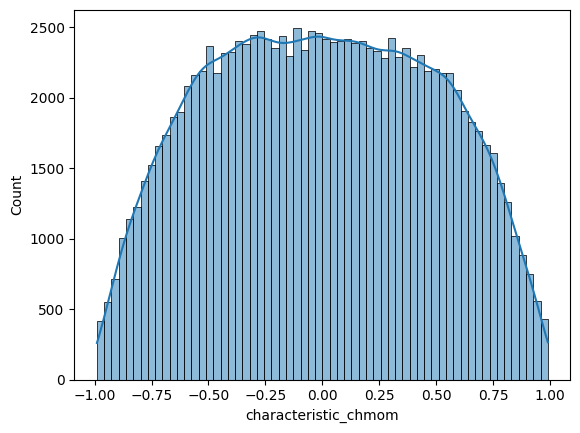

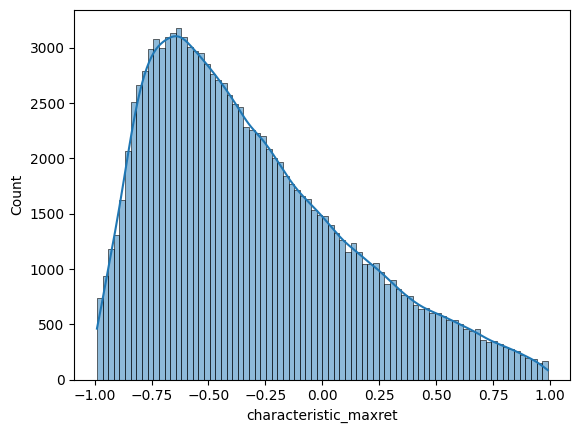

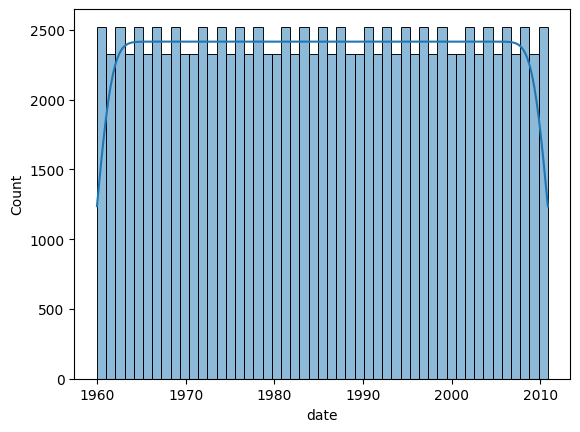

In [25]:
# check the distribution of the differnect variables
for i in df.columns:
    plt.figure(i)
    sns.histplot(data=df, x=i, kde=True)

# LSTM (https://www.youtube.com/watch?v=tepxdcepTbY)

In [36]:
# get the desired libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tensorflow.keras.optimizers.legacy import Adam

In [37]:
# convert the permno column to intergers:
df['permno'] = df['permno'].astype(int)

# select only the permno where permno = 10145
df_new = df[df['permno'] == 10145]

# convert date into datetime format (only for the plotting later)
train_dates = pd.to_datetime(df_new['date'])

cols = list(df_new)[2:14]

#New dataframe with only training data - 5 columns
df_for_training = df_new[cols].astype(float)
df_for_training

# scale the variables
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.


#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()



trainX shape == (597, 14, 12).
trainY shape == (597, 1).
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 14, 64)            19712     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 32,161
Trainable params: 32,161
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5


2023-02-17 15:11:59.229146: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-17 15:11:59.928204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - ETA: 0s - loss: 1.0251

2023-02-17 15:12:11.608657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 13s 339ms/step - loss: 1.0251 - val_loss: 0.5676
Epoch 2/5
34/34 [==============================] - 11s 313ms/step - loss: 1.0103 - val_loss: 0.5302
Epoch 3/5
34/34 [==============================] - 11s 320ms/step - loss: 1.0051 - val_loss: 0.5447
Epoch 4/5
34/34 [==============================] - 11s 314ms/step - loss: 1.0012 - val_loss: 0.5263
Epoch 5/5
34/34 [==============================] - 11s 318ms/step - loss: 0.9959 - val_loss: 0.6380


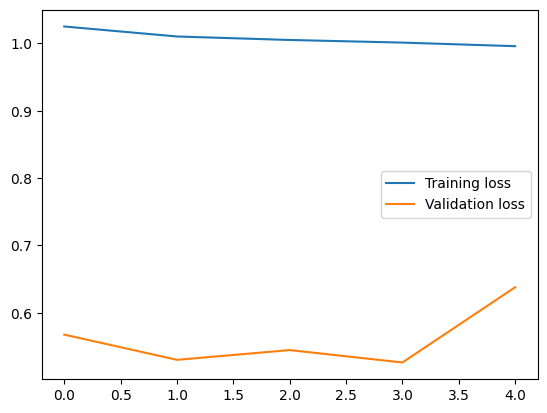

In [8]:
# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [38]:
n_future = 30  # Number of days we want to look into the future based on the past days.
forecast_periods_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

forecast = model.predict(trainX[-n_future:]) #forecast

forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_periods_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'ret_excess':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])


original = df_new[['date', 'ret_excess']]

original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2020-5-1']

sns.lineplot(original['date'], original['ret_excess'])
#sns.lineplot(df_forecast['date'], df_forecast['ret_excess'])


1/1 [==============================] - 0s 337ms/step


2023-02-17 15:27:59.129175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/var/folders/73/n7lgj33x23g9bs4jy5z1pgg40000gn/T/ipykernel_52033/3152889079.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['date']=pd.to_datetime(original['date'])


TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

# LSTM

# Example of LSTM